# Analysis Notebook

1. Travel Distance
2. Vehicle Availability
3. Need Level

In [1]:
# Import libraries

import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read in data

gdf = gpd.read_file("data/accessibility.geojson")

print(gdf.shape)
gdf.head()

(621, 7)


,GEOID,Avg_Distance,Total_Households,No_Vehicle_Available,Pct_Without_Vehicle,Need_Level,geometry
0,06001428301,38.0,2492.0,19.0,0.8,2.0,"POLYGON ((6052475.926 2095914.933, 6052663.072..."
1,06001428302,31.0,2474.0,134.0,5.4,2.0,"POLYGON ((6052287.465 2096919.257, 6052335.227..."
2,06001428400,6.0,1873.0,76.0,4.1,1.0,"POLYGON ((6050238.370 2096212.064, 6052054.809..."
3,06001430900,30.0,1864.0,90.0,4.8,1.0,"POLYGON ((6101137.659 2081426.591, 6101182.977..."
4,06001431000,33.0,1087.0,90.0,8.3,3.0,"POLYGON ((6100691.400 2077938.162, 6100718.229..."


## 1. Average Travel Distance

In [3]:
# Summary statistics on the travel distance variable

gdf["Avg_Distance"].describe()

count    619.000000
mean      38.424879
std       22.020263
min        3.000000
25%       25.000000
50%       35.000000
75%       46.000000
max      200.000000
Name: Avg_Distance, dtype: float64

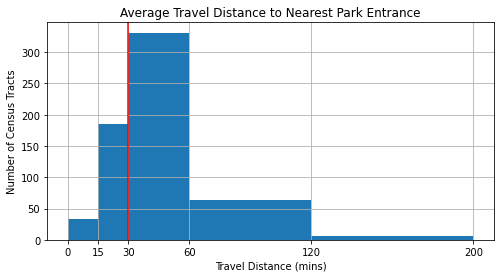

In [4]:
# Visualize the statistical distribution of the travel distance variable

bins = [0, 15, 30, 60, 120, 200]

gdf.hist(column = "Avg_Distance",
         bins = bins,
         grid = True,
         figsize = (8,4)
        )

plt.xticks(bins)
plt.axvline(x=30, color='red')
plt.xlabel("Travel Distance (mins)")
plt.ylabel("Number of Census Tracts")
plt.title("Average Travel Distance to Nearest Park Entrance")

plt.show();

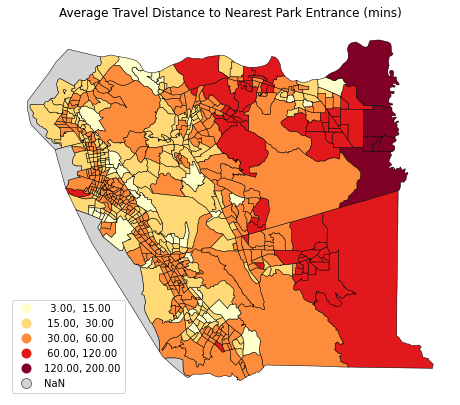

In [5]:
# Visualize the spatial distribution of the travel distance variable

gdf.plot(column = "Avg_Distance",
         figsize = (8,8),
         cmap = "YlOrRd",
         edgecolor = "black",
         linewidth = 0.5,
         scheme = "user_defined",
         classification_kwds = {'bins': [15,30,60,120,200]},
         legend = True,
         legend_kwds={'loc': "lower left"},
         missing_kwds= dict(color = "lightgrey")
        )
plt.title("Average Travel Distance to Nearest Park Entrance (mins)")
plt.axis("off")
plt.savefig("img/travel_dist.png", facecolor = 'w', bbox_inches = 'tight')
plt.show();

In [6]:
# How many tracts have over 30 mins average travel distance?

# Count the tracts
over_30_count = gdf.loc[gdf["Avg_Distance"] > 30, "GEOID"].count()
print(f"{over_30_count} tracts have avg travel distance of over 30 mins")

# Percentage of tracts
over_30_pct = round((over_30_count / gdf["Avg_Distance"].count()) * 100)
print(f"{over_30_pct}% of tracts have avg travel distance of over 30 mins")

385 tracts have avg travel distance of over 30 mins
62% of tracts have avg travel distance of over 30 mins


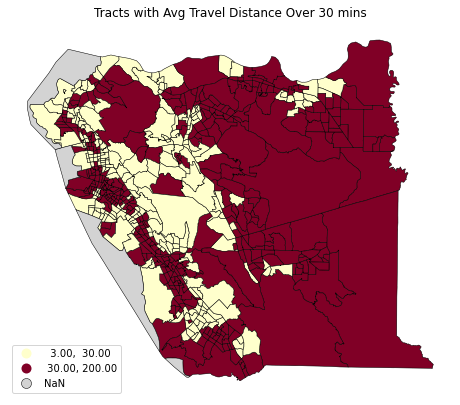

In [7]:
# Visualize which tracts have over 30 mins average travel distance

gdf.plot(column = "Avg_Distance",
         figsize = (8,8),
         cmap = "YlOrRd",
         edgecolor = "black",
         linewidth = 0.5,
         scheme = "user_defined",
         classification_kwds = {'bins': [30,200]},
         legend = True,
         legend_kwds={'loc': "lower left"},
         missing_kwds= dict(color = "lightgrey")
        )
plt.title("Tracts with Avg Travel Distance Over 30 mins")
plt.axis("off")
plt.show();

## 2. Vehicle Availability

In [8]:
# Summary statistics on the travel distance variable

gdf["Pct_Without_Vehicle"].describe()

count    519.000000
mean       7.997110
std        8.551683
min        0.000000
25%        2.200000
50%        4.900000
75%       10.650000
max       60.300000
Name: Pct_Without_Vehicle, dtype: float64

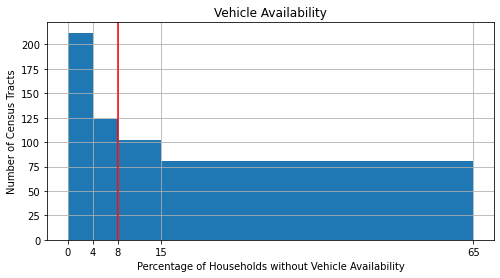

In [9]:
# Visualize the statistical distribution of percent households without vehicle availability

bins = [0, 4, 8, 15, 65]

gdf.hist(column = "Pct_Without_Vehicle",
         bins = bins,
         grid = True,
         figsize = (8,4)
        )

plt.xticks(bins)
plt.axvline(x=8, color='red')
plt.xlabel("Percentage of Households without Vehicle Availability")
plt.ylabel("Number of Census Tracts")
plt.title("Vehicle Availability")

plt.show();

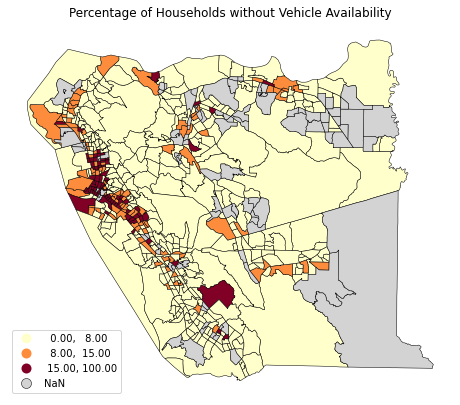

In [10]:
# Visualize the geographical distribution of percent households without vehicle availability

gdf.plot(column = "Pct_Without_Vehicle",
         figsize = (8,8),
         cmap = "YlOrRd",
         edgecolor = "black",
         linewidth = 0.5,
         scheme = "user_defined",
         classification_kwds = {'bins': [8,15,100]},
         legend = True,
         legend_kwds={'loc': "lower left"},
         missing_kwds= dict(color = "lightgrey")
        )
plt.title("Percentage of Households without Vehicle Availability")
plt.axis("off")
plt.savefig("img/vehicle_availability.png")
plt.show();

In [11]:
# How many tracts have above average (8%) percentages?

# Count the tracts
over_8_count = gdf.loc[gdf["Pct_Without_Vehicle"] > 8, "GEOID"].count()
print(f"{over_8_count} tracts have above average percentage of households without vehicles")

# Percentage of tracts
over_8_pct = round((over_8_count / gdf["Pct_Without_Vehicle"].count()) * 100)
print(f"{over_8_pct}% of tracts have above average percentage of households without vehicles")

180 tracts have above average percentage of households without vehicles
35% of tracts have above average percentage of households without vehicles


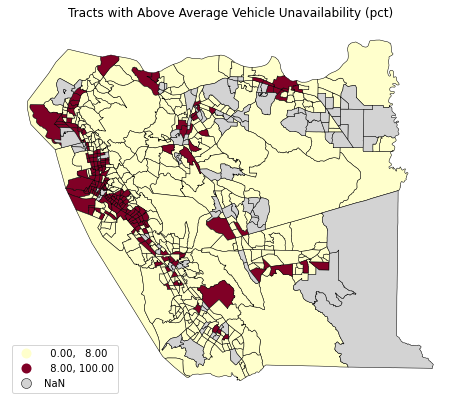

In [12]:
# Visualize which tracts have above average percent households without vehicle availability

gdf.plot(column = "Pct_Without_Vehicle",
         figsize = (8,8),
         cmap = "YlOrRd",
         edgecolor = "black",
         linewidth = 0.5,
         scheme = "user_defined",
         classification_kwds = {'bins': [8,100]},
         legend = True,
         legend_kwds={'loc': "lower left"},
         missing_kwds= dict(color = "lightgrey")
        )
plt.title("Tracts with Above Average Vehicle Unavailability (pct)")
plt.axis("off")
plt.show();

## 3. Need Level

The Need Level variable categorizes census tracts into three levels of need for greater access to regional parks via transit: <1> low (within 30 mins), <2> medium (outside 30 mins, above average vehicle availability), and <3> high (outside 30 mins, below average vehicle availability). Note: Average vehicle availability is 8%.

In [13]:
# Summary statistics on the need level variable

gdf["Need_Level"].describe()

count    548.000000
mean       1.786496
std        0.772020
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: Need_Level, dtype: float64

In [14]:
# Distribution counts of the need level variable

gdf["Need_Level"].value_counts()

1.0    234
2.0    197
3.0    117
Name: Need_Level, dtype: int64

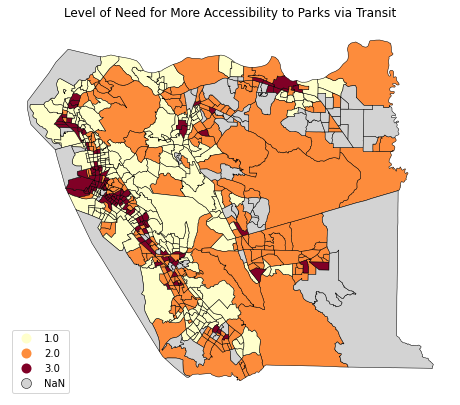

In [15]:
# Visualize the geographical distribution of the need level variable

gdf.plot(column = "Need_Level",
         figsize = (8,8),
         cmap = "YlOrRd",
         edgecolor = "black",
         linewidth = 0.5,
         categorical = True,
         legend = True,
         legend_kwds={'loc': "lower left"},
         missing_kwds= dict(color = "lightgrey")
        )
plt.title("Level of Need for More Accessibility to Parks via Transit")
plt.axis("off")
plt.savefig("img/need_level.png")
plt.show();